<a href="https://colab.research.google.com/github/surendiran04/CIP/blob/main/registration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O haarcascade_frontalface_default.xml https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml


--2025-03-03 14:51:18--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2025-03-03 14:51:19--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2025

📷 Opening Camera...


<IPython.core.display.Javascript object>

✅ Image captured and saved as 'captured_image.jpg'


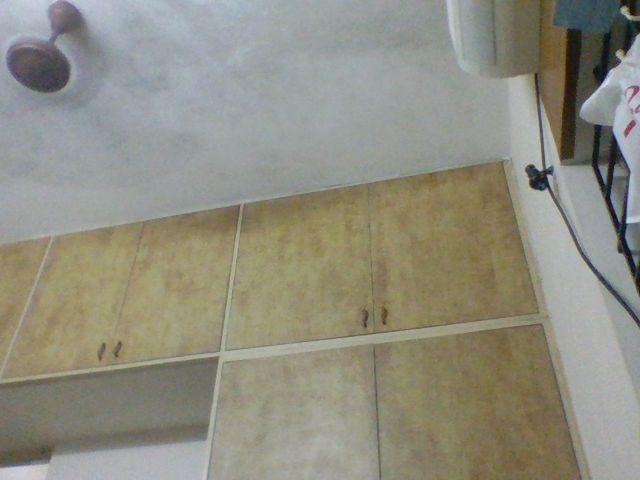

In [ ]:
from google.colab import output
from IPython.display import display, Javascript, Image
import base64
import io
from PIL import Image as PILImage

def take_photo():
    display(Javascript('''
        async function takePhoto() {
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });

            document.body.appendChild(video);
            video.srcObject = stream;
            await new Promise((resolve) => video.onloadedmetadata = resolve);
            video.play();

            const captureButton = document.createElement('button');
            captureButton.textContent = 'Capture';
            document.body.appendChild(captureButton);

            return new Promise((resolve) => {
                captureButton.onclick = () => {
                    const canvas = document.createElement('canvas');
                    canvas.width = video.videoWidth;
                    canvas.height = video.videoHeight;
                    canvas.getContext('2d').drawImage(video, 0, 0);
                    const dataUrl = canvas.toDataURL('image/jpeg', 0.8);

                    stream.getTracks().forEach(track => track.stop());  // Stop the camera
                    video.remove();
                    captureButton.remove();

                    resolve(dataUrl);  // Return the captured image
                };
            });
        }

        google.colab.kernel.invokeFunction('notebook.captureImage', [], {});
    '''))

    return output.eval_js("takePhoto()")  # Wait for image capture

def capture_image():
    print("📷 Opening Camera...")

    image_data = take_photo()  # Get image data URL

    if not image_data:
        print("❌ No image captured.")
        return

    # Convert base64 image data to OpenCV/PIL format
    image_bytes = io.BytesIO(base64.b64decode(image_data.split(",")[1]))
    image = PILImage.open(image_bytes)
    image.save("captured_image.jpg")

    print("✅ Image captured and saved as 'captured_image.jpg'")
    display(Image("captured_image.jpg"))

capture_image()


In [26]:
from google.colab import output
from IPython.display import display, Javascript, Image
import base64
import io
import os
import csv
import ipywidgets as widgets
from PIL import Image as PILImage

# Create folder to store registered images
os.makedirs("registered_faces", exist_ok=True)

# Input fields inside the notebook
name_input = widgets.Text(placeholder="Enter your Name")
reg_no_input = widgets.Text(placeholder="Enter your Registration Number")
capture_button = widgets.Button(description="Capture Image")

display(name_input, reg_no_input, capture_button)

# Function to capture multiple images
def take_photos(num_photos=5, delay=1000):
    js = f'''
        async function takePhotos() {{
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({{ video: true }});
            document.body.appendChild(video);
            video.srcObject = stream;
            await new Promise((resolve) => video.onloadedmetadata = resolve);
            video.play();

            let capturedImages = [];

            for (let i = 0; i < {num_photos}; i++) {{
                await new Promise(resolve => setTimeout(resolve, {delay}));
                const canvas = document.createElement('canvas');
                canvas.width = video.videoWidth;
                canvas.height = video.videoHeight;
                canvas.getContext('2d').drawImage(video, 0, 0);
                capturedImages.push(canvas.toDataURL('image/jpeg', 0.8));
            }}

            stream.getTracks().forEach(track => track.stop());
            video.remove();

            return capturedImages;  // Return captured images
        }}
        takePhotos();
    '''
    return output.eval_js(js)  # Get captured images

# Function to register user and save multiple images
def register_user(b):
    name = name_input.value.strip()
    reg_no = reg_no_input.value.strip()

    if not name or not reg_no:
        print("❌ Registration failed. Please enter valid details.")
        return

    print(f"📷 Capturing images for {name} ({reg_no})...")

    image_data_list = take_photos()  # Capture images
    if not image_data_list:
        print("❌ No images captured.")
        return

    image_list = []
    for i, image_data in enumerate(image_data_list):
        image_bytes = io.BytesIO(base64.b64decode(image_data.split(",")[1]))
        image = PILImage.open(image_bytes)
        filename = f"registered_faces/{name}_{reg_no}_{i+1}.jpg"
        image.save(filename)
        image_list.append(filename)

    # Save details in CSV file
    with open("registered_users.csv", "a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow([name, reg_no] + image_list)

    print(f"✅ {name} ({reg_no}) registered successfully!")

# Link button to function
capture_button.on_click(register_user)


Text(value='', placeholder='Enter your Name')

Text(value='', placeholder='Enter your Registration Number')

Button(description='Capture Images', style=ButtonStyle())

📷 Capturing images for rgs (234)...
✅ rgs (234) registered successfully!
